This is some connect 

In [39]:
# Must be included at the beginning of each new notebook. Remember to change the app name.
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

In [40]:
file = 'violence_data_NEW.csv'
df = spark.read.csv(file, header=True, inferSchema=True)

In [41]:
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)

In [42]:
#3.1 drop the 'Usere feedback' field
columns_to_drop = ['User feedback']
new_df = df.drop(*columns_to_drop)

In [43]:
new_df.columns

['RecordID',
 'Country',
 'Gender',
 'Demographics Question',
 'Demographics Response',
 'Question',
 'Survey Year',
 'Value']

In [44]:
#use your sales average to fill missing data. 
from pyspark.sql.functions import mean
#3.2 Dealing with the null value in 'Value' field
mean_value = df.select(mean(df['Value'])).collect()[0][0]
new_df = new_df.na.fill({'Value': mean_value})

In [45]:
new_df.show()
new_df.printSchema()

+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----------------+
|RecordID|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|            Value|
+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----------------+
|       1|Afghanistan|     F|       Marital status|        Never married|... if she burns ...| 01/01/2015|19.76253687315632|
|       1|Afghanistan|     F|            Education|               Higher|... if she burns ...| 01/01/2015|             10.1|
|       1|Afghanistan|     F|            Education|            Secondary|... if she burns ...| 01/01/2015|             13.7|
|       1|Afghanistan|     F|            Education|              Primary|... if she burns ...| 01/01/2015|             13.8|
|       1|Afghanistan|     F|       Marital status| Widowed, divorced...|... if she burns ...| 01/01/2015|             13.8|


In [46]:
new = 'Value'

new_df.select(new).show()
new_df.select(new).describe().show()

+-----------------+
|            Value|
+-----------------+
|19.76253687315632|
|             10.1|
|             13.7|
|             13.8|
|             13.8|
|             17.0|
|             17.3|
|             18.0|
|             18.1|
|             18.2|
|             18.3|
|             18.3|
|             18.8|
|             19.1|
|             20.8|
|19.76253687315632|
|              4.5|
|              4.6|
|              5.2|
|              6.3|
+-----------------+
only showing top 20 rows

+-------+------------------+
|summary|             Value|
+-------+------------------+
|  count|             12600|
|   mean| 19.76253687315705|
| stddev|16.005588776096097|
|    min|               0.0|
|    max|              86.9|
+-------+------------------+



In [47]:
#3.3 Constructing new data from 'Value' called 'Measurement'
from pyspark.sql.functions import mean, col, when 
data_copy_33 = new_df.withColumn(
    'Measurement',
    when(col('Value') == mean_value, 0).otherwise(1)
)


In [48]:
new = 'Measurement'

data_copy_33.select(new).show()
data_copy_33.select(new).describe().show()

+-----------+
|Measurement|
+-----------+
|          0|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          0|
|          1|
|          1|
|          1|
|          1|
+-----------+
only showing top 20 rows

+-------+-------------------+
|summary|        Measurement|
+-------+-------------------+
|  count|              12600|
|   mean| 0.8878571428571429|
| stddev|0.31555465373180014|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [49]:
data_copy_33.printSchema()

root
 |-- RecordID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Demographics Question: string (nullable = true)
 |-- Demographics Response: string (nullable = true)
 |-- Question: string (nullable = true)
 |-- Survey Year: string (nullable = true)
 |-- Value: double (nullable = false)
 |-- Measurement: integer (nullable = false)



In [50]:
#3.4 Merging with other dataframe
file2 = 'violence_data_merge.csv'
merge_df = spark.read.csv(file2, header=True, inferSchema=True)

In [51]:
merge_df.show()

+--------+----+----+----+----+----+----+----+-------------+
|RecordID| _c1| _c2| _c3| _c4| _c5| _c6| _c7|User feedback|
+--------+----+----+----+----+----+----+----+-------------+
|       1|null|null|null|null|null|null|null|         null|
|       1|null|null|null|null|null|null|null|         null|
|       1|null|null|null|null|null|null|null|         null|
|       1|null|null|null|null|null|null|null|           10|
|       1|null|null|null|null|null|null|null|         null|
|       1|null|null|null|null|null|null|null|         null|
|       1|null|null|null|null|null|null|null|           23|
|       1|null|null|null|null|null|null|null|            e|
|       1|null|null|null|null|null|null|null|           4t|
|       1|null|null|null|null|null|null|null|             |
|       1|null|null|null|null|null|null|null|         null|
|       1|null|null|null|null|null|null|null|         null|
|       1|null|null|null|null|null|null|null|          532|
|       1|null|null|null|null|null|null|

23/10/12 13:48:33 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: RecordID, , , , , , , , User feedback
 Schema: RecordID, _c1, _c2, _c3, _c4, _c5, _c6, _c7, User feedback
Expected: _c1 but found: 
CSV file: file:///home/ubuntu/722_I4/violence_data_merge.csv


In [52]:
merged_data = data_copy_33.join(merge_df, 'RecordID')

In [53]:
merged_data.show()
merged_data.printSchema()

23/10/12 13:48:33 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: RecordID, , , , , , , , User feedback
 Schema: RecordID, _c1, _c2, _c3, _c4, _c5, _c6, _c7, User feedback
Expected: _c1 but found: 
CSV file: file:///home/ubuntu/722_I4/violence_data_merge.csv


+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----------------+-----------+----+----+----+----+----+----+----+-------------+
|RecordID|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|            Value|Measurement| _c1| _c2| _c3| _c4| _c5| _c6| _c7|User feedback|
+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----------------+-----------+----+----+----+----+----+----+----+-------------+
|       1|Afghanistan|     F|       Marital status|        Never married|... if she burns ...| 01/01/2015|19.76253687315632|          0|null|null|null|null|null|null|null|           4e|
|       1|Afghanistan|     F|       Marital status|        Never married|... if she burns ...| 01/01/2015|19.76253687315632|          0|null|null|null|null|null|null|null|         gf43|
|       1|Afghanistan|     F|       Marital status|        Never marri

In [54]:
#3.5 Removing all the other fields that do not have anything contains
columns_to_drop = ['_c1', '_c2', '_c3', '_c4', '_c5', '_c6', '_c7']
merged_data = merged_data.drop(*columns_to_drop)

In [55]:
merged_data.printSchema()
new = 'Value'

df.select(new).show()
merged_data.select(new).describe().show()

root
 |-- RecordID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Demographics Question: string (nullable = true)
 |-- Demographics Response: string (nullable = true)
 |-- Question: string (nullable = true)
 |-- Survey Year: string (nullable = true)
 |-- Value: double (nullable = false)
 |-- Measurement: integer (nullable = false)
 |-- User feedback: string (nullable = true)

+-----+
|Value|
+-----+
| null|
| 10.1|
| 13.7|
| 13.8|
| 13.8|
| 17.0|
| 17.3|
| 18.0|
| 18.1|
| 18.2|
| 18.3|
| 18.3|
| 18.8|
| 19.1|
| 20.8|
| null|
|  4.5|
|  4.6|
|  5.2|
|  6.3|
+-----+
only showing top 20 rows

+-------+------------------+
|summary|             Value|
+-------+------------------+
|  count|            378000|
|   mean| 19.76253687315055|
| stddev|16.004974791697258|
|    min|               0.0|
|    max|              86.9|
+-------+------------------+



In [56]:
#4.1 Feature selection & Encoding the string fields
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.feature import VectorAssembler

In [57]:
#Encoding 'Country'
indexer = StringIndexer(inputCol="Country", outputCol="CountryIndex")
encoder = OneHotEncoder(inputCols=["CountryIndex"], outputCols=["CountryVec"])
df = indexer.fit(df).transform(df)
df = encoder.fit(df).transform(df)

In [58]:
df.printSchema()

root
 |-- RecordID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Demographics Question: string (nullable = true)
 |-- Demographics Response: string (nullable = true)
 |-- Question: string (nullable = true)
 |-- Survey Year: string (nullable = true)
 |-- Value: double (nullable = true)
 |-- User feedback: string (nullable = true)
 |-- CountryIndex: double (nullable = false)
 |-- CountryVec: vector (nullable = true)



In [59]:
#Encoding 'Gender'
indexer = StringIndexer(inputCol="Gender", outputCol="GenderIndex")
encoder = OneHotEncoder(inputCols=["GenderIndex"], outputCols=["GenderVec"])
df = indexer.fit(df).transform(df)
df = encoder.fit(df).transform(df)
df.printSchema()

root
 |-- RecordID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Demographics Question: string (nullable = true)
 |-- Demographics Response: string (nullable = true)
 |-- Question: string (nullable = true)
 |-- Survey Year: string (nullable = true)
 |-- Value: double (nullable = true)
 |-- User feedback: string (nullable = true)
 |-- CountryIndex: double (nullable = false)
 |-- CountryVec: vector (nullable = true)
 |-- GenderIndex: double (nullable = false)
 |-- GenderVec: vector (nullable = true)



In [60]:
#Encoding 'Demographics Response' 
#responseIndexer = StringIndexer(inputCol="Demographics Response", outputCol="ResponseIndex")
#responseEncoder = OneHotEncoder(inputCols=["ResponseIndex"], outputCols=["ResponseVec"])
#df = responseIndexer.fit(df).transform(df)
#df = responseEncoder.fit(df).transform(df)
indexer = StringIndexer(inputCol="Demographics Response", outputCol="ResponseIndex")
df = indexer.fit(df).transform(df)
df.printSchema()

root
 |-- RecordID: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Demographics Question: string (nullable = true)
 |-- Demographics Response: string (nullable = true)
 |-- Question: string (nullable = true)
 |-- Survey Year: string (nullable = true)
 |-- Value: double (nullable = true)
 |-- User feedback: string (nullable = true)
 |-- CountryIndex: double (nullable = false)
 |-- CountryVec: vector (nullable = true)
 |-- GenderIndex: double (nullable = false)
 |-- GenderVec: vector (nullable = true)
 |-- ResponseIndex: double (nullable = false)



In [61]:
df.show()
#retreat

new_df = df.na.fill(0)


+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+-------------+------------+--------------+-----------+-------------+-------------+
|RecordID|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|Value|User feedback|CountryIndex|    CountryVec|GenderIndex|    GenderVec|ResponseIndex|
+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+-------------+------------+--------------+-----------+-------------+-------------+
|       1|Afghanistan|     F|       Marital status|        Never married|... if she burns ...| 01/01/2015| null|         null|         0.0|(69,[0],[1.0])|        0.0|(1,[0],[1.0])|          7.0|
|       1|Afghanistan|     F|            Education|               Higher|... if she burns ...| 01/01/2015| 10.1|         null|         0.0|(69,[0],[1.0])|        0.0|(1,[0],[1.0])|          5.0|
|       1|Afghanistan|   

In [62]:
new_df.show()

+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+-------------+------------+--------------+-----------+-------------+-------------+
|RecordID|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|Value|User feedback|CountryIndex|    CountryVec|GenderIndex|    GenderVec|ResponseIndex|
+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+-------------+------------+--------------+-----------+-------------+-------------+
|       1|Afghanistan|     F|       Marital status|        Never married|... if she burns ...| 01/01/2015|  0.0|         null|         0.0|(69,[0],[1.0])|        0.0|(1,[0],[1.0])|          7.0|
|       1|Afghanistan|     F|            Education|               Higher|... if she burns ...| 01/01/2015| 10.1|         null|         0.0|(69,[0],[1.0])|        0.0|(1,[0],[1.0])|          5.0|
|       1|Afghanistan|   

In [63]:
from pyspark.sql.functions import skewness
skewness_value = new_df.select(skewness(new_df['Value'])).collect()[0][0]
print(f"Skewness of 'Value': {skewness_value}")


Skewness of 'Value': 1.1445442844796359


In [64]:
from pyspark.sql.functions import sqrt
new_df = new_df.withColumn('new_values', sqrt(new_df['Value']))


In [65]:
new_df.show()
new_df.printSchema()

+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+-------------+------------+--------------+-----------+-------------+-------------+------------------+
|RecordID|    Country|Gender|Demographics Question|Demographics Response|            Question|Survey Year|Value|User feedback|CountryIndex|    CountryVec|GenderIndex|    GenderVec|ResponseIndex|        new_values|
+--------+-----------+------+---------------------+---------------------+--------------------+-----------+-----+-------------+------------+--------------+-----------+-------------+-------------+------------------+
|       1|Afghanistan|     F|       Marital status|        Never married|... if she burns ...| 01/01/2015|  0.0|         null|         0.0|(69,[0],[1.0])|        0.0|(1,[0],[1.0])|          7.0|               0.0|
|       1|Afghanistan|     F|            Education|               Higher|... if she burns ...| 01/01/2015| 10.1|         null|         0.0|(69,[

In [66]:
##########

In [67]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Random Forest Classification - Country
#with pipeline
feature_columns = ['ResponseIndex'] 
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")#create the feature columns
rf = RandomForestClassifier(labelCol="GenderIndex", featuresCol="features", numTrees=10)

#Initialize the pipeline
pipeline = Pipeline(stages=[assembler, rf])

#split the data& Training data
train_data, test_data = df.randomSplit([0.8, 0.2])
model = pipeline.fit(train_data)
#check the accuracy
predictions = model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(
    labelCol="GenderIndex", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy = {accuracy}")



Accuracy = 0.47802197802197804


In [68]:

predictions.select('RecordID', 'Gender', 'prediction').show()
predictions.groupBy('Gender', 'prediction').count().show()
predictions.show()


+--------+------+----------+
|RecordID|Gender|prediction|
+--------+------+----------+
|       1|     F|       1.0|
|       1|     F|       1.0|
|       1|     F|       1.0|
|       1|     F|       1.0|
|       1|     F|       1.0|
|       1|     M|       0.0|
|       1|     M|       0.0|
|       2|     F|       0.0|
|       2|     F|       1.0|
|       2|     M|       0.0|
|       2|     M|       1.0|
|       2|     M|       0.0|
|       2|     M|       0.0|
|       3|     F|       1.0|
|       3|     F|       1.0|
|       3|     F|       1.0|
|       3|     M|       1.0|
|       3|     M|       1.0|
|       3|     M|       1.0|
|       4|     F|       1.0|
+--------+------+----------+
only showing top 20 rows

+------+----------+-----+
|Gender|prediction|count|
+------+----------+-----+
|     M|       1.0|  867|
|     F|       1.0|  962|
|     F|       0.0|  351|
|     M|       0.0|  368|
+------+----------+-----+



In [69]:
#Random Forest Classification - Response

feature_columns = ['ResponseIndex']  # form the feature columns 
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
# initialize RandomForestClassifier
rf = RandomForestClassifier(labelCol="GenderIndex", featuresCol="features", numTrees=10)
output = assembler.transform(new_df)

#split the data
train_data, test_data = output.randomSplit([0.7, 0.3])

# Trianing model 
rf_model = rf.fit(train_data)

# find thetransformation 
predictions = rf_model.transform(test_data)

In [70]:
#Caculate the accuracy of the model
evaluator = MulticlassClassificationEvaluator(labelCol="GenderIndex", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

#get the f1 score
evaluator.setMetricName("f1")
f1 = evaluator.evaluate(predictions)
print(f"F1 Score: {f1}")

Accuracy: 0.47286012526096033
F1 Score: 0.4429504617256258


In [71]:
feature_importances = rf_model.featureImportances# Get the importance from 'Response'
print(f"Feature Importances: {feature_importances}")

Feature Importances: (1,[0],[1.0])


In [72]:
# Form the array that contains all the country name
unique_countries = new_df.select("Demographics Response").distinct().rdd.map(lambda row: row[0]).collect()
print(unique_countries)


['Employed for cash', 'Urban', 'Widowed, divorced, separated', 'Secondary', 'Never married', '15-24', '25-34', 'Married or living together', 'Higher', '35-49', 'No education', 'Primary', 'Employed for kind', 'Rural', 'Unemployed']


In [73]:

#Searching for the importance 
feature_importances = rf_model.featureImportances.toArray()
feature_names = unique_countries  

features_and_importances = zip(feature_names, feature_importances)


sorted_features = sorted(features_and_importances, key=lambda x: x[1], reverse=True)

#ordered them 
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Employed for cash: 1.0


In [74]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


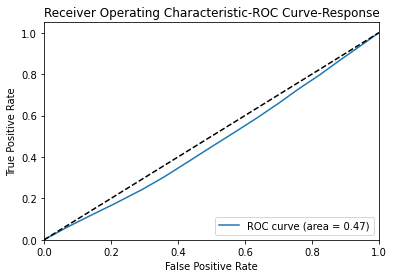

In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

#Roc
# Geting the probability 
predictions = rf_model.transform(test_data).select("probability", "GenderIndex").toPandas()


y_prob = np.array([v[1] for v in predictions["probability"]])

# Caculating the value of ROC
fpr, tpr, _ = roc_curve(predictions["GenderIndex"], y_prob)

# Caculating AUC（Area Under Curve）
roc_auc = auc(fpr, tpr)

# Drawing the plots
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)#Drawing the ROC line
plt.plot([0, 1], [0, 1], 'k--')#drawing the baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')#Apply the labels
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC Curve-Response')
plt.legend(loc="lower right")
plt.show()
